<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-lightcurves-tess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

# TESS lightcurves

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams['font.size'] = 12

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## long (30-minute) cadence 

In [2]:
#initialize LongCadence class
l = cr.LongCadence(toiid=200, sap_mask='square', aper_radius=2)

Target: TOI 200
Available sectors: [1]
Using sector=1.


## custom

Searching targetpixelfile for ra,dec=(354.915 -69.196) using Tesscut
Removing scattered light + applying PLD
Querying Gaia DR2 catalog for ra,dec=(354.915 -69.196) within 120.0 arcsec.


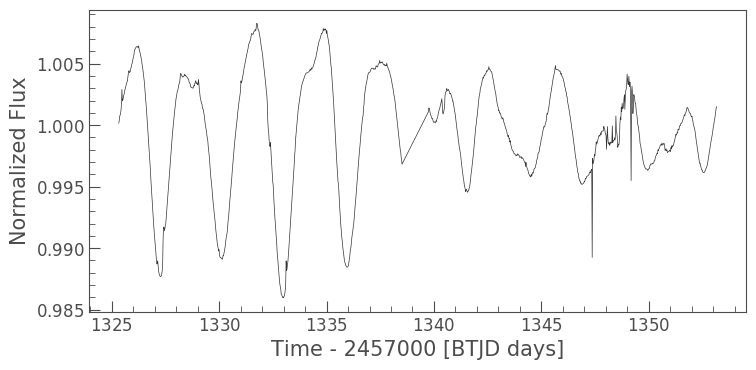

In [3]:
#make custom lightcurve
lc = l.make_custom_lc()
lc.plot();

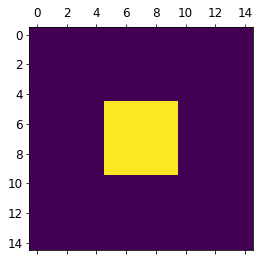

In [4]:
# show aperture mask
pl.matshow(l.aper_mask)

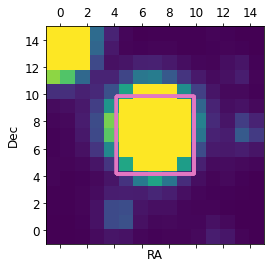

In [5]:
#show tpf with aperture mask
img = np.median(l.tpf_tesscut.flux, axis=0)
cr.plot_aperture_outline(img, mask=l.aper_mask)

In [111]:
#which pixel contains most information?
#https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html
from sklearn.feature_selection import f_regression, mutual_info_regression

#inside aperture
X = l.tpf_tesscut.flux[:,l.aper_mask] #pixel lightcurves
y = lc.time #lc.flux #
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

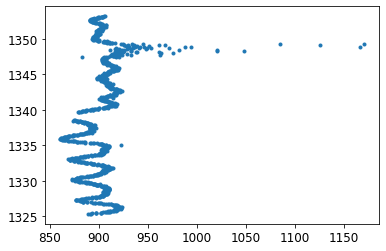

In [112]:
pl.plot(X[:,24].T, lc.time, '.')
# pl.plot(X[:,24].T, y, '.')

In [93]:
f_test_matrix = np.zeros(l.aper_mask.shape)
mi_matrix = np.zeros(l.aper_mask.shape)

x,y=np.nonzero(l.aper_mask)
for i,(x,y) in enumerate(zip(x,y)):
    mi_matrix[x,y] = mi[i]
    f_test_matrix[x,y] = f_test[i]

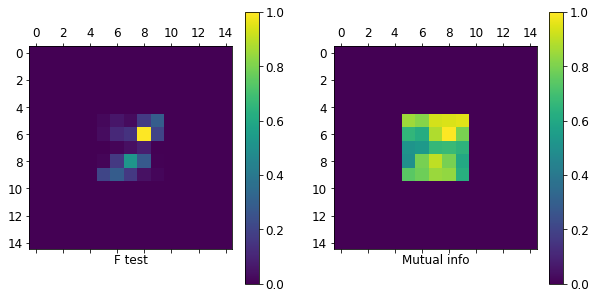

In [94]:
fig, ax = pl.subplots(1,2,figsize=(10,5))
c1=ax[0].matshow(f_test_matrix)
c2=ax[1].matshow(mi_matrix)
ax[0].set_xlabel('F test')
ax[1].set_xlabel('Mutual info')
pl.colorbar(c1,ax=ax[0])
pl.colorbar(c2,ax=ax[1])

### varying apertures

Searching targetpixelfile for ra,dec=(354.915 -69.196) using Tesscut
Removing scattered light + applying PLD
Searching targetpixelfile for ra,dec=(354.915 -69.196) using Tesscut
Brightest star detected is near the edges.
Aperture mask is placed at the center instead.

Removing scattered light + applying PLD
Searching targetpixelfile for ra,dec=(354.915 -69.196) using Tesscut
Removing scattered light + applying PLD
Searching targetpixelfile for ra,dec=(354.915 -69.196) using Tesscut
Removing scattered light + applying PLD


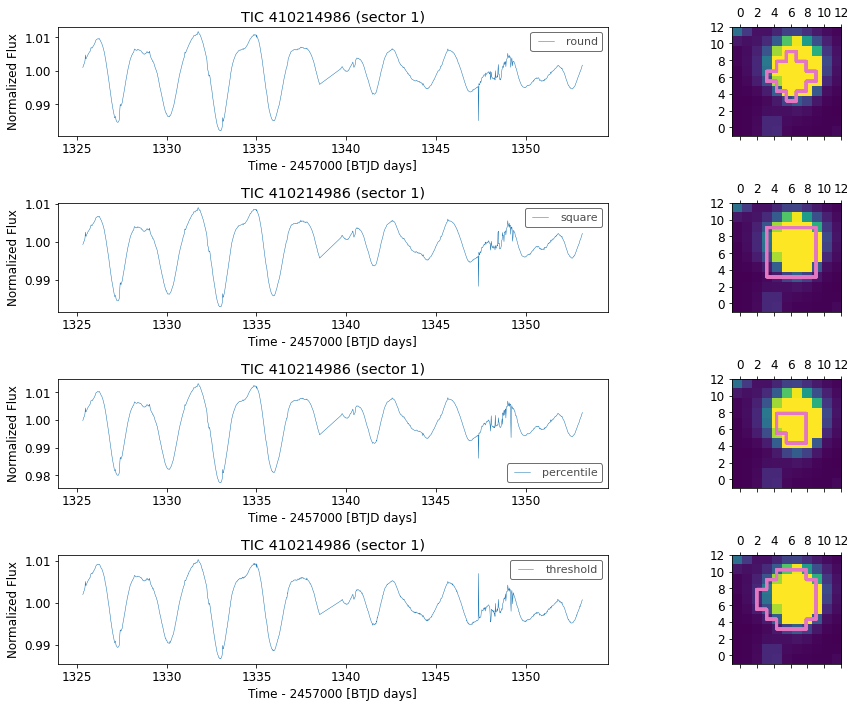

In [6]:
#custom lightcurves with varying apertures
masks = ['round','square','percentile','threshold']
kwargs = {'aper_radius': 2, 'percentile': 95, 'threshold_sigma': 5}

fig, axs = pl.subplots(len(masks),2, figsize=(15,10))

custom_lcs = {}
for n,sap_mask in enumerate(masks):
    lc = l.make_custom_lc(sap_mask=sap_mask, tpf_size=(12,12), **kwargs)
    lc.plot(ax=axs[n,0],label=sap_mask)
    custom_lcs[sap_mask] = lc
    axs[n,0].set_title(f'TIC {l.ticid} (sector {lc.sector})')
    
    tpf = l.tpf_tesscut.cutout(size=12)
    img = np.median(tpf.flux, axis=0)
    _ = cr.plot_aperture_outline(img, mask=l.aper_mask, imgwcs=tpf.wcs, ax=axs[n,1])
fig.tight_layout()

Querying Gaia DR2 catalog for ra,dec=(354.915 -69.196) within 3.0 arcsec.
Querying Gaia DR2 catalog for ra,dec=(354.915 -69.196) within 60.0 arcsec.
Brightest star detected is near the edges.
Aperture mask is placed at the center instead.

Querying DSS2 Red (2.38 arcmin x 2.38 arcmin) archival image


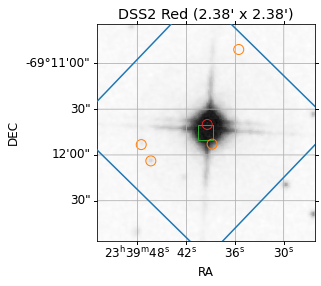

In [7]:
depth = l.toi_params['Depth (ppm)']/1e6
kmax = 1

#query target Gaia parameters
gaia_params = l.query_gaia_dr2_catalog(return_nearest_xmatch=True)

#query gaia sources 1 arcmin around the target 
gaia_sources = l.query_gaia_dr2_catalog(radius=60)

cr.plot_gaia_sources_on_survey(tpf=l.tpf_tesscut, 
                            sap_mask=l.sap_mask,
                            target_gaiaid=l.gaiaid, 
                            gaia_sources=l.gaia_sources, 
                            depth=depth, 
                            **kwargs
                           )

Brightest star detected is near the edges.
Aperture mask is placed at the center instead.



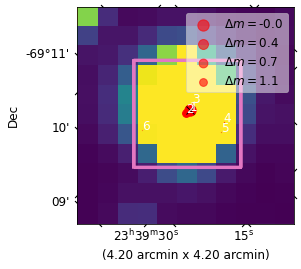

In [8]:
cr.plot_gaia_sources_on_tpf(tpf=l.tpf_tesscut, 
                            sap_mask=l.sap_mask,
                            target_gaiaid=l.gaiaid, 
                            gaia_sources=l.gaia_sources, 
                            depth=depth, 
                            **kwargs
                           )

### CDIPS method

Target: TOI 837
Available sectors: [10 11]
Using sector=10.
Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec
Gaia and TIC catalog cross-match succeeded.
Found 2 CDIPS lightcurves.


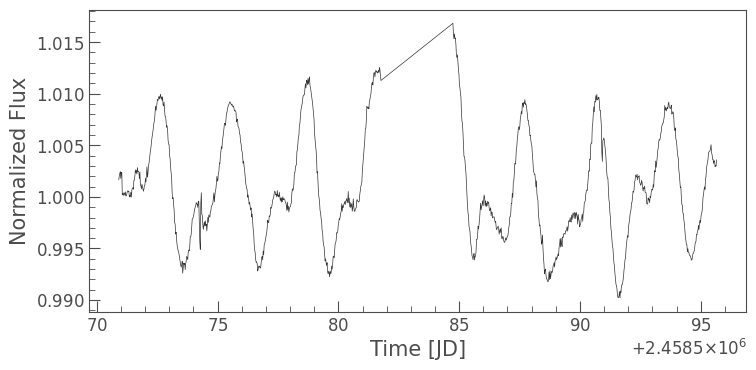

In [2]:
#get CDIPS lightcurve using a method that calls CDIPS class
l = cr.LongCadence(toiid=837)
lc = l.get_cdips_lc() 
lc.plot();

In [ ]:
#vary aperture using index 1,2,3

cdips_lcs = {}
fig, ax = pl.subplots(1,1, figsize=(10,6))
for aper in [1,2,3]:
    lc = l.get_cdips_lc(sector=10, aper_idx=aper, verbose=False)
    lc.plot(ax=ax, label=f'aper={aper}')
    cdips_lcs[aper] = lc
ax.set_title(f'TIC {l.ticid} (sector {lc.sector})')

### CDIPS class

Query CDIPS lightcurve using the CDIPS class

The target is along galactic plane
* [youtube: sector 10](https://www.youtube.com/watch?v=hbGg8oU1qNM)
* [youtube: sector 11](https://www.youtube.com/watch?v=E_wpg9mZ5u4)

In [5]:
#instantiate CDIPS class
cdips = cr.CDIPS(gaiaDR2id=l.gaiaid, 
                 sector=10, 
                 aper_idx=3, 
                 lctype='flux', 
                 verbose=False
                )

There are 2 gaia sources within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec
Gaia and TIC catalog cross-match succeeded.
Found 2 CDIPS lightcurves.


In [6]:
##cdips target header
cdips.header0[:10]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CAMERA  =                    3 / Camera number                                  
CCD     =                    1 / CCD chip number                                
FRAMETIM=                  2.0 / [s] frame time (INT_TIME + READTIME)           
INSTRUME= 'TESS Photometer'    / detector type                                  
INTTIME =                 1.98 / [s] photon accumulation time per frame         
NREADOUT=                  720 / number of read per cadence                     

In [7]:
#cdips lightcurve header
cdips.header[8:-37:2]

TTYPE1  = 'BGE     '           / Background measurement error                   
TTYPE2  = 'BGV     '           / Background value (after bkgd surface subtrxn)  
TTYPE3  = 'FDV     '           / Measured D value (see Pal 2009 eq 31)          
TTYPE4  = 'FKV     '           / Measured K value (see Pal 2009 eq 31)          
TTYPE5  = 'FSV     '           / Measured S value (see Pal 2009 eq 31)          
TTYPE6  = 'IFE1    '           / Flux error in aperture 1 (ADU)                 
TTYPE7  = 'IFE2    '           / Flux error in aperture 2 (ADU)                 
TTYPE8  = 'IFE3    '           / Flux error in aperture 3 (ADU)                 
TTYPE9  = 'IFL1    '           / Flux in aperture 1 (ADU)                       
TTYPE10 = 'IFL2    '           / Flux in aperture 2 (ADU)                       
TTYPE11 = 'IFL3    '           / Flux in aperture 3 (ADU)                       
TTYPE12 = 'IRE1    '           / Instrumental mag error for aperture 1          
TTYPE13 = 'IRE2    '        

In [8]:
#catalog reference(s) which claimed cluster membership
cdips.catalog_ref

'Kharchenko2013,Kounkel_2019,CantatGaudin_2018,GaiaCollaboration2018_tab1a'

In [9]:
#star name(s) in catalog ref
cdips.catalog_gaiaids

'786691642,5251470948229949568,5251470948229949568,5251470948229949568'

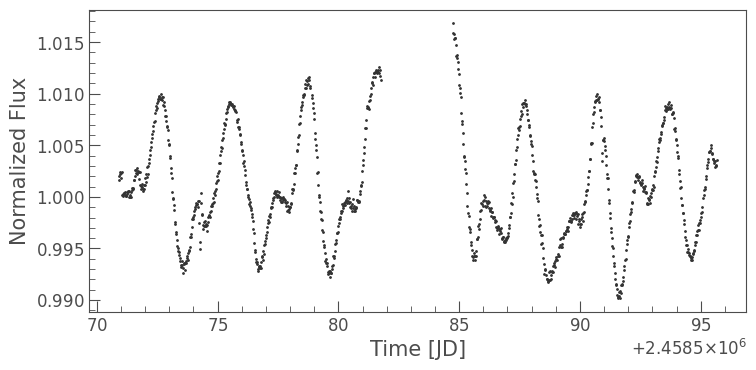

In [10]:
cdips.lc.scatter()

There are 2 gaia sources within 3.0 arcsec.


(-0.036995375, 0.036995375)

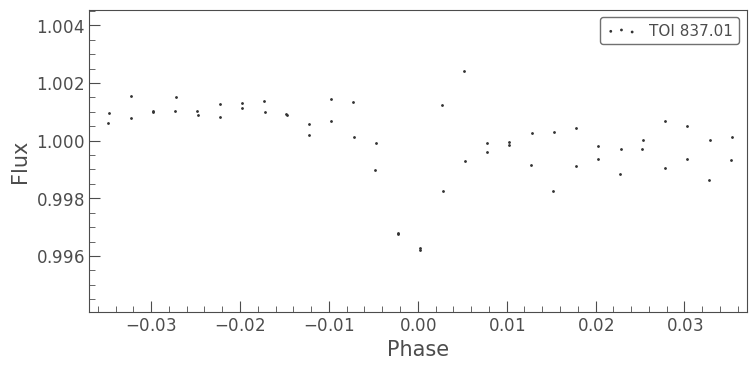

In [32]:
toi = 837
#get ephemeris from TOI release (https://tev.mit.edu/data/)
d = cr.get_toi(toi=f'{toi}.01', verbose=False)
per, t0, dur = d[['Period (days)', 'Epoch (BJD)', 'Duration (hours)']].values[0]

t = cr.Target(toiid=toi, verbose=False)
t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
#initialize cdips
cdips = cr.CDIPS(gaiaDR2id=t.gaiaid, 
                 sector=10, 
                 aper_idx=2, 
                 verbose=False)
#get lc and turn into lk.TessLightCurve
lc = cdips.lc
#add label
lc.label = f'TOI {toi}.01'
#plot
ax = lc.remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter()
ax.set_xlim([-dur/24/2,dur/24/2])

In [33]:
#multi sector

toi = 837
#get ephemeris from TOI release (https://tev.mit.edu/data/)
d = cr.get_toi(toi=f'{toi}.01', verbose=False)
per, t0 = d[['Period (days)', 'Epoch (BJD)']].values[0]
        
t = cr.Target(toiid=toi, verbose=False)
#get gaia id
t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
#initialize cdips

lcs = {}
#available sectors
for sector in t.get_all_sectors():
    try:
        cdips = cr.CDIPS(gaiaDR2id=t.gaiaid, 
                         sector=sector, 
                         aper_idx=3, 
                         verbose=False)
        #get lc and turn into lk.TessLightCurve
        lc = cdips.lc
        #add label
        lc.label = f'TOI {toi}.01'
        lcs[sector]=lc
    except:
        print(f'sector {sector} is not available.')

There are 2 gaia sources within 3.0 arcsec.
sector 11 is not available.


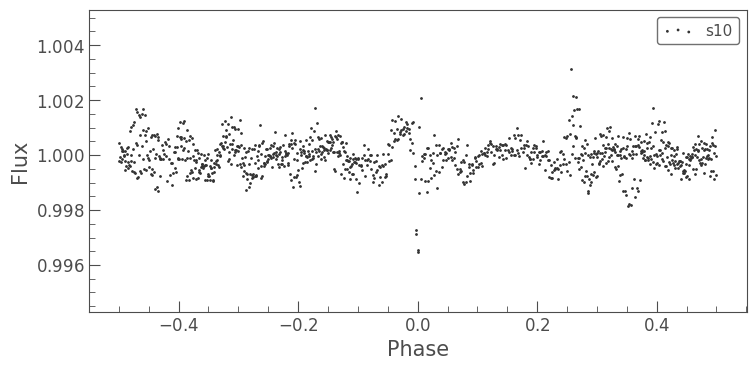

In [34]:
#plot
ax = lcs[10].remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter(label='s10')
# lcs[11].remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter(ax=ax, label='s11')
# ax.set_xlim([-0.05,0.05])

## short cadence

In [1]:
import chronos as cr

s = cr.ShortCadence(toiid=837)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Available sectors: [10, 11]
Using sector=10.


### custom

Searching targetpixelfile using lightkurve

Searching mast for TIC 460205581

2 tpf(s) found in sector(s) [10, 11]
Using data from sector 10 only


Applying data quality mask identified in Data Release Notes (sector 10):
t>1570.8762|t<1581.78453|t>1584.72342

Querying Gaia DR2 catalog for 157.037 -64.5052 within 120.0 arcsec.



Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

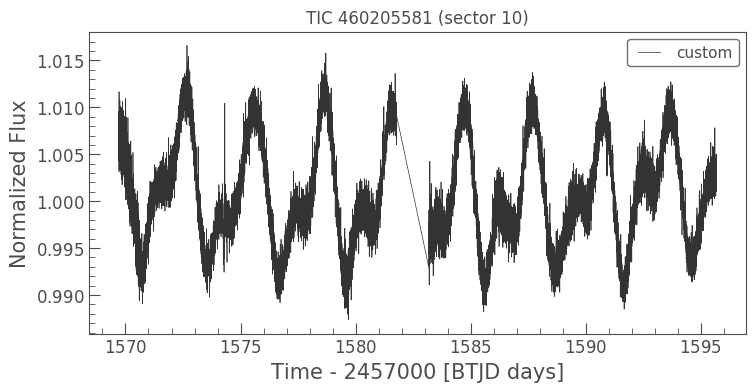

In [2]:
#make custom lc
custom_lc = s.make_custom_lc(sap_mask='pipeline')
ax = custom_lc.plot(label='custom')
ax.set_title(f'TIC {s.ticid} (sector {s.sector})')

Brightest star detected is near the edges.
Aperture mask is placed at the center instead.

Brightest star is detected near the edges.
Aperture mask is placed at the center instead.



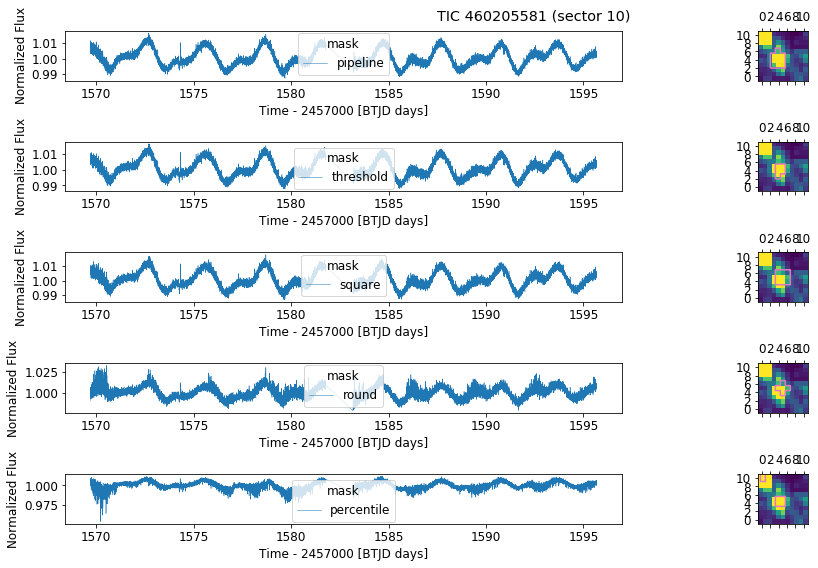

In [7]:
masks = 'pipeline threshold square round percentile'.split()
fig, axs = pl.subplots(len(masks), 2, figsize=(15,8))

kwargs = {'aper_radius': 1, 'threshold_sigma': 5, 'percentile': 95}

for n,mask in enumerate(masks):
    custom_lc = s.make_custom_lc(sap_mask=mask, **kwargs)
    _ = custom_lc.plot(ax=axs[n,0], label=mask)
    axs[n,0].legend(title='mask')
    
    img = np.median(s.tpf.flux, axis=0)
    _ = cr.plot_aperture_outline(img, mask=s.aper_mask, ax=axs[n,1])
#     axs[n,1].set_title(mask)
fig.suptitle(f'TIC {s.ticid} (sector {s.sector})')
fig.tight_layout()

### pipeline lc: SAP and PDCSAP

Searching lightcurvefile for TIC 460205581 (sector 10)


Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

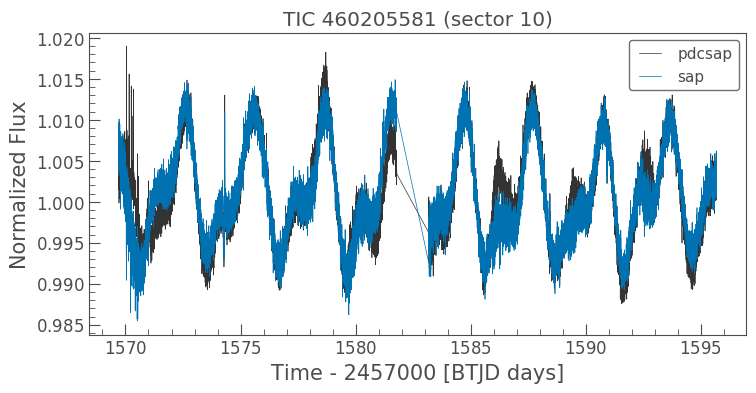

In [8]:
#get pipeline lc
pdcsap = s.get_lc(lctype='pdcsap')
ax = pdcsap.plot(label='pdcsap')

sap = s.get_lc(lctype='sap')
sap.plot(ax=ax, label='sap')
ax.set_title(f'TIC {s.ticid} (sector {pdcsap.sector})')

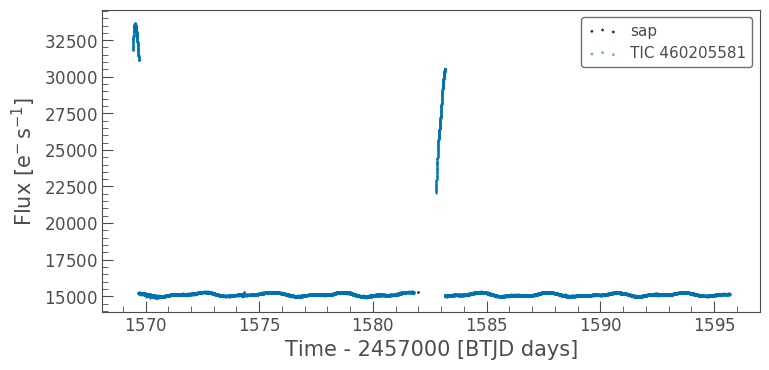

In [10]:
#note that these two are identical
ax = s.lc_sap.bin(100).scatter(label='sap') #sap
s.tpf.to_lightcurve(aperture_mask='pipeline').scatter(ax=ax, alpha=0.5) #also sap

## stellar rotation

In [11]:
toiid = 837
s=cr.ShortCadence(toiid=toiid)

Available sectors: [10, 11]
Using sector=10.


Searching lightcurvefile for TIC 460205581 (sector 10)


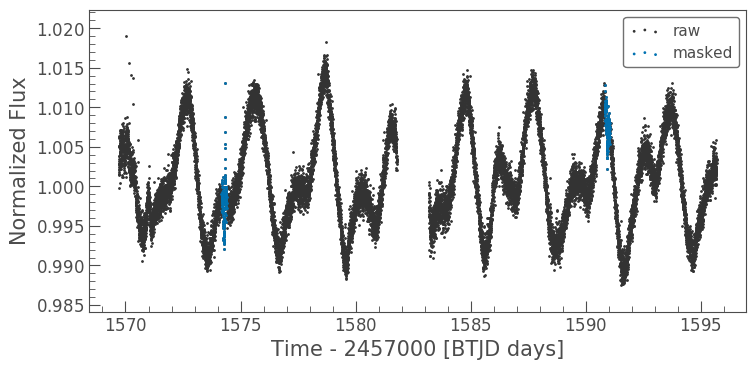

In [12]:
lc=s.get_lc()

#get ephemeris
toi_params = cr.get_toi(toi=toiid, clobber=False, verbose=False).iloc[0]
period = toi_params['Period (days)']
t0 = toi_params['Epoch (BJD)']-cr.utils.TESS_TIME_OFFSET
duration_hours = toi_params['Duration (hours)']

#mask transit
temp_fold = lc.fold(period, t0=t0)
fractional_duration = (duration_hours / 24.0) / period
phase_mask = np.abs(temp_fold.phase) < (fractional_duration * 1.5)
transit_mask = np.in1d(lc.time, temp_fold.time_original[phase_mask])

#plot
ax = lc.scatter(label='raw')
lc[transit_mask].scatter(ax=ax, label='masked', c='C1')

Text(0.5, 0.98, 'TOI 837 (sector 10)')

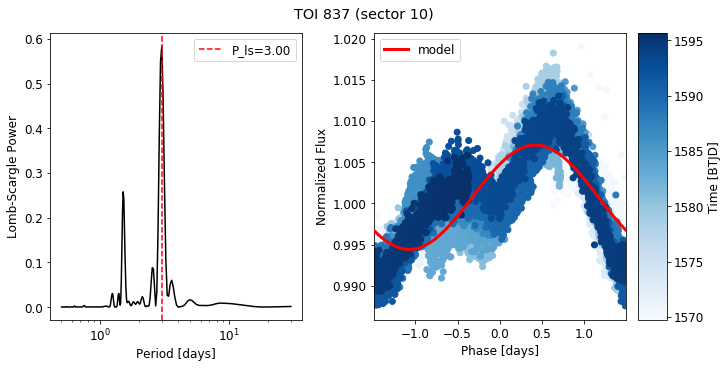

In [13]:
fig = cr.plot_lomb_scargle(lc[~transit_mask].time, lc[~transit_mask].flux)
fig.suptitle(f"TOI {toiid} (sector {s.sector})")